# Import all the required libraries 

In [70]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
#inline statement - displays the graphs in the current notebook
% matplotlib inline
from sklearn.model_selection import train_test_split, LeaveOneOut, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, scale, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso
from sklearn import preprocessing

Let us load the modified csv file from the previous notebook **house_prices_cleaned.csv**

In [71]:
house_prices_new = pd.read_csv("./Data/house_prices_cleaned.csv")

In [72]:
house_prices_new.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


# Data Standardization

In [73]:
house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1',
     'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
     'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea',
     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']] = StandardScaler().fit_transform(house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt',
                                       'YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                                       '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
                                       'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces',
                                       'GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
                                       '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']])

In [74]:
house_prices_new.shape

(1460, 81)

# Encode the categorical data


**One Hot Encoding -** 

In [75]:
# Used get_dummies to produce binary matrix dummy variables 
new_house_prices = pd.get_dummies(house_prices_new, columns=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
                                                'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                                                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
                                                'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
                                                'BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                                                'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                                                'PavedDrive','PoolQC', 'Fence', 'MiscFeature','SaleType','SaleCondition'])

After One hot encoding the number of variables have increased because dummy variables have been introduced to the resultant matrix

In [76]:
new_house_prices.shape

(1460, 306)

In [77]:
new_house_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,...,0,0,0,1,0,0,0,0,1,0
2,3,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,...,0,0,0,1,0,0,0,0,1,0
3,4,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,...,0,0,0,1,1,0,0,0,0,0
4,5,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,...,0,0,0,1,0,0,0,0,1,0


In [78]:
new_house_prices.isnull().values.any()

False

In [79]:
new_house_prices.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,...,0,0,0,1,0,0,0,0,1,0
1,2,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,...,0,0,0,1,0,0,0,0,1,0
2,3,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,...,0,0,0,1,0,0,0,0,1,0
3,4,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,...,0,0,0,1,1,0,0,0,0,0
4,5,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,...,0,0,0,1,0,0,0,0,1,0


In [134]:
# Create a new data frame house_prices_new_numerical which contains columns that are of type numerical 
house_prices_new_numerical = house_prices_new.select_dtypes(include = [np.number])

It is worthwhile to check if the number of columns that result from introducing the dummy variables is correct wrt the number of unique values per categorical variables.

In the code below I compute the aggregation of the no. of unique values per categorical variable to check that the no. of columns is equals to the no. of columns for non-categorical variables plus the number computed below.

In [135]:
house_prices_new_numerical.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,0.073375,-0.225902,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511514,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,2,-0.872563,0.425052,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.573359,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,3,0.073375,-0.095711,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323322,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,4,0.309859,-0.442886,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.573359,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,5,0.073375,0.598640,0.375148,1.374795,-0.517200,0.951632,0.733308,1.363915,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000


In [136]:
# No of columns produced only by categorical variables
s = 0
for col in house_prices_new:
    if house_prices_new[col].dtype == 'object':
        s  = s + house_prices_new[col].nunique()  

# No of numerical columns 
n = len(house_prices_new_numerical.columns)

In [137]:
# The total number of columns produced after One Hot Encoding will be the sum of 's' and 'n'
total_cols = s+n
total_cols
if len(new_house_prices.columns) == total_cols:
    print("Column numbers match: %s" % total_cols)

Column numbers match: 306


# Split the data into test and train data sets


In [84]:
X = new_house_prices.drop('SalePrice', axis=1)

In [85]:
X_train, X_test, Y_train, Y_test  = train_test_split(X, new_house_prices.SalePrice, test_size=0.3, random_state=10)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1022, 305)
(438, 305)
(1022,)
(438,)


# Regression Analysis  

** Multiple Linear Regression**

In [131]:
# Create an object lm for the LinearRegression model
lm = LinearRegression()
# Fit the model on the training data
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [132]:
lm.score(X_train, Y_train)

0.9357569703721463

In [133]:
import statsmodels.api as sm
X = house_prices_new[['MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea',
        'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath',
        'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt',
        'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',
        'MoSold','YrSold']]
Y = house_prices_new['SalePrice']
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     6.343
Date:                Sat, 20 Oct 2018   Prob (F-statistic):           5.86e-26
Time:                        14:20:12   Log-Likelihood:                -19772.
No. Observations:                1460   AIC:                         3.961e+04
Df Residuals:                    1426   BIC:                         3.979e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass    -7751.6575   6255.474     -1.239      0.215      -2e+04    4519.262
LotFrontage   -1534.7682   5948.077     -0.258      0.796   -1.32e+04    1.01e+04
LotArea        4309.4956   5442.596      0.792      0.429   -6366.859     1.5e+04
OverallQual    2.404e+04   8801.436      2.732      0.006    6776.092    4.13e+04
OverallCond    5186.2497   6161.811      0.842      0.400   -6900.937    1.73e+04
YearBuilt      8378.9476   1.08e+04      0.775      0.438   -1.28e+04    2.96e+04
YearRemodAdd   2823.7228   7593.014      0.372      0.710   -1.21e+04    1.77e+04
MasVnrArea     5626.2114   5755.739      0.977      0.328   -5664.412    1.69e+04
BsmtFinSF1     4328.7757   5429.140      0.797      0.425   -6321.182     1.5e+04
BsmtFinSF2     -228.5180   4970.623     -0.046      0.963   -9979.036    9522.000
BsmtUnfSF      -199.8616   4702.380     -0.043      0.966   -9424.185    9024.462
TotalBsmtSF    4215.0611   6698.308      0.629      0.529   -8924.534    1.74e+04
1stFlrSF       8564.0716   7957.913      1.076      0.282   -7046.401    2.42e+04
2ndFlrSF       9559.1067   6935.754      1.378      0.168   -4046.270    2.32e+04
LowQualFinSF     -7.3055   5164.098     -0.001      0.999   -1.01e+04    1.01e+04
GrLivArea      1.424e+04   7239.642      1.967      0.049      39.253    2.84e+04
BsmtFullBath   4793.3480   7264.324      0.660      0.509   -9456.561     1.9e+04
BsmtHalfBath    457.6175   5239.316      0.087      0.930   -9819.977    1.07e+04
FullBath       1887.1767   8375.684      0.225      0.822   -1.45e+04    1.83e+04
HalfBath       -943.8989   7178.262     -0.131      0.895    -1.5e+04    1.31e+04
BedroomAbvGr  -8200.3334   7444.890     -1.101      0.271   -2.28e+04    6403.777
KitchenAbvGr  -2636.0392   6153.485     -0.428      0.668   -1.47e+04    9434.814
TotRmsAbvGrd   8220.8485   1.08e+04      0.763      0.446   -1.29e+04    2.94e+04
Fireplaces     2519.7661   6138.898      0.410      0.682   -9522.474    1.46e+04
GarageYrBlt    2710.9325   8818.667      0.307      0.759   -1.46e+04       2e+04
GarageCars     8312.3492   1.15e+04      0.723      0.470   -1.42e+04    3.09e+04
GarageArea     -820.5652   1.14e+04     -0.072      0.943   -2.32e+04    2.15e+04
WoodDeckSF     2994.1661   5381.681      0.556      0.578   -7562.696    1.36e+04
OpenPorchSF    -179.1728   5386.176     -0.033      0.973   -1.07e+04    1.04e+04
EnclosedPorch   701.9129   5522.835      0.127      0.899   -1.01e+04    1.15e+04
3SsnPorch       595.4686   4931.294      0.121      0.904   -9077.901    1.03e+04
ScreenPorch    3111.9090   5137.736      0.606      0.545   -6966.422    1.32e+04
PoolArea      -1163.2670   5116.441     -0.227      0.820   -1.12e+04    8873.292
MiscVal        -392.3765   4934.544     -0.080      0.937   -1.01e+04    9287.367
MoSold         -117.1390   4997.339     -0.023   

Let us look at all the features and thier respective coefficients.

In [88]:
# Features and their respective coefficients
coeffs_df = pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['Features', 'Estimated_Coefficients'])
coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
33,MiscVal,21298.626224
16,BsmtFullBath,15327.722992
14,LowQualFinSF,14026.806738
4,OverallCond,10836.631181
6,YearRemodAdd,10465.033786
3,OverallQual,8831.872085
12,1stFlrSF,8304.026483
9,BsmtFinSF2,6891.937360
5,YearBuilt,6805.543499
13,2ndFlrSF,5140.709475


Let us have a closer look at the coefficients to explore the linear and non-linear relationship of the features with the target variable 'Sale Price'

In [89]:
pos_coeffs_df= coeffs_df[(coeffs_df['Estimated_Coefficients'] >= 0)].sort_values(by='Estimated_Coefficients', ascending=False)
#pos_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)
pos_coeffs_df

,Features,Estimated_Coefficients
33,MiscVal,21298.626224
16,BsmtFullBath,15327.722992
14,LowQualFinSF,14026.806738
4,OverallCond,10836.631181
6,YearRemodAdd,10465.033786
3,OverallQual,8831.872085
12,1stFlrSF,8304.026483
9,BsmtFinSF2,6891.937360
5,YearBuilt,6805.543499
13,2ndFlrSF,5140.709475


In [90]:
neg_coeffs_df = coeffs_df[(coeffs_df['Estimated_Coefficients'] < 0)].sort_values(by='Estimated_Coefficients', ascending = True)
neg_coeffs_df

,Features,Estimated_Coefficients
22,TotRmsAbvGrd,-3429.718480
21,KitchenAbvGr,-2904.693587
25,GarageCars,-1489.893249
15,GrLivArea,-1152.076289
35,YrSold,-1136.824685
1,LotFrontage,-626.091765
20,BedroomAbvGr,-217.771808
30,3SsnPorch,-158.479333
34,MoSold,-81.729301


- Features like MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd have linear correlation with Sale Price
- According to the analysis above total number of rooms and kitchen above grade (above basement), garage area and year sold have negative correlation with Sale Price. 
- This is quite surprising as to why would total number of rooms above ground and garage area have negative correlation with the Sale Price

**Regression Plot**

Let us draw a regression plot between the test target values and predicted test values to assess how the model is performing.

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

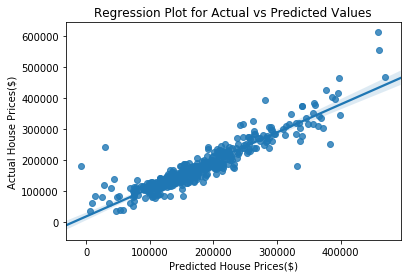

In [91]:
g = sns.regplot(x=lm.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

From the graph above the model seems to be a good fit for the data, except for a few outliers in the houses highly priced.

In [92]:
# R2 for train and test data
R2_reg_train = lm.score(X_train,Y_train)
R2_reg_test = lm.score(X_test,Y_test)
print('R squared for train data is: %.3f' %(R2_reg_train))
print('R squared for test data is: %.3f' %(R2_reg_test))

R squared for train data is: 0.936
R squared for test data is: 0.843


**RMSE Value**

In [93]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((Y_train - lm.predict(X_train))**2))
RMSE_reg_test = sqrt(np.mean((Y_test - lm.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_reg_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_reg_test))

Root mean squared error for train data is: 20426.160
Root mean sqaured error for test data is: 30352.931


**Residual Plots**

Text(0.5, 1.0, 'Residual Plot using train data')

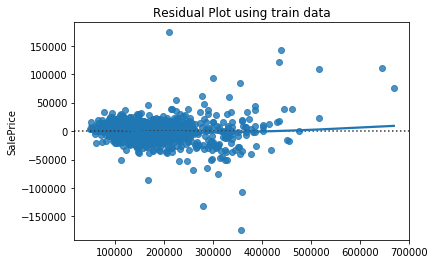

In [94]:
sns.residplot(x=lm.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot using train data')

Residual plot for the training data shows that the data points lie between \$-50,000 to \$50,000. 

Text(0.5, 1.0, 'Residual Plot using test data')

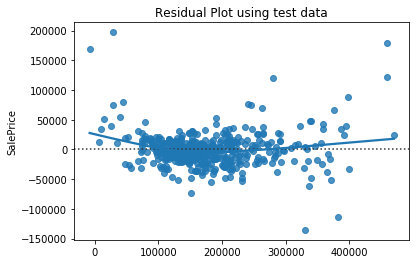

In [95]:
sns.residplot(x=lm.predict(X_test), y=Y_test, lowess=True)
plt.title('Residual Plot using test data')

Test data is also showing the same range from the reference line.

Text(0, 0.5, 'Residuals')

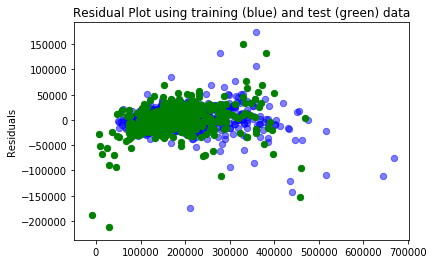

In [96]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

The blue dots represent train data and grren dots represent test data. From the residual plot above it is evident that the model is a good fit for test data as well. The data lies between +/- \$50,000 from the reference line. 

**Analysis:** 
- The regression line appears to be a **good fit for the data**.
- The train and test scores not being too different form each other, indiactes that there is **no Overfitting**.
- The distribution of test and train data looks similar in the residual plot, which says that there is **no big difference in residuals**. And the data is spread around -50,000 and 50,000. 
- In terms of the actual problem we can infer that there might be a difference of \$50,000 for every house if important features like Aminities, Full bath in basement, Quality of finished square footage, Overall condition and quality of the house, Remodel date etc. 
- This seems to be relevant in the real world scenario in real estate market. For example the difference between a basement house and a non-basement house is \$50,000. Similarly an increase in number of bedrooms/ bathrooms/ square footage can increase the price of the house by \$30,000 - \$40,000.
- Clearly the **important features** that control the house price are the **Condition, Square footage(basement, 1st & 2nd floors), Garage area, Year built/remodeled**.

# Regularization


- Ridge Regression
- Lasso Regression


**1. Ridge Regression**

In [97]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for RidgeCV
ridge_reg = RidgeCV(alphas=alphas, cv=None, store_cv_values=True)
# Fit the model to our training data
ridge_reg.fit(X_train,Y_train)

RidgeCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=True)

In [98]:
# R2 for train and test data respectively
R2_ridge_train = (ridge_reg.score(X_train, Y_train))
R2_ridge_test = (ridge_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_ridge_train))
print('R squared for test data is: %.3f' %(R2_ridge_test))

R squared for train data is: 0.898
R squared for test data is: 0.887


RMSE values for train and test data sets

In [99]:
RMSE_ridge_train = sqrt(np.mean((Y_train - ridge_reg.predict(X_train))**2))
RMSE_ridge_test = sqrt(np.mean((Y_test - ridge_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_test))

Root mean squared error for train data is: 25725.420
Root mean sqaured error for test data is: 25777.429


Let us see the best alpha parameter for Ridge Regression

In [100]:
alpha_ridge_cv = ridge_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_ridge_cv))

The estimated best regularization parameter is: 10.0


**Regression Plot**


Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

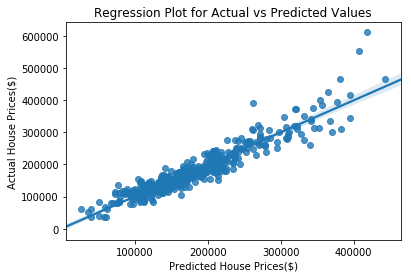

In [101]:
# Regression plot between actual and predicted prices 
g = sns.regplot(x=ridge_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

**Residual Plots**


_Residual Plot - Train data_

Text(0.5, 1.0, 'Residual Plot for train data')

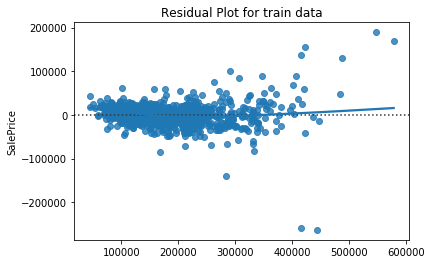

In [102]:
sns.residplot(x=ridge_reg.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot for train data')

The data seems to be close to the reference line (at 0). The data is spread around $-50,000 to $50,000 which is quite normal in real estate market.

_Residual Plot - Test data_

Text(0.5, 1.0, 'Residual Plot for test data')

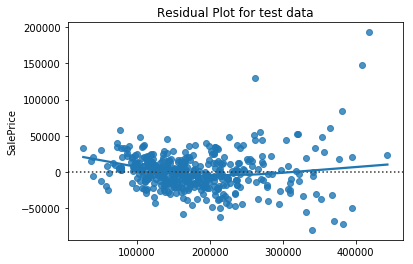

In [103]:
sns.residplot(x=ridge_reg.predict(X_test), y=Y_test, lowess=True)
plt.title('Residual Plot for test data')

The residual plot for test data looks similar to the train data which is a good sign. We can see that the major percent of data lies within teh $-50,000 and $50,000 range which is the same as train data. Except for that there are a few outliers which is natural when the model is exposed to data outside the training data set.

_Residual Plot - Train and Test data_

Text(0, 0.5, 'Residuals')

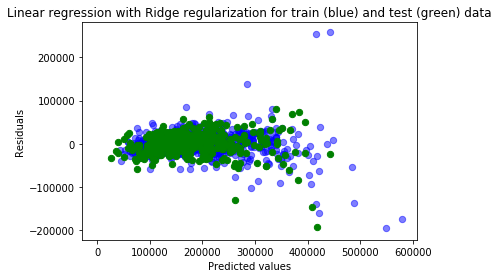

In [104]:
plt.scatter(ridge_reg.predict(X_train), ridge_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(ridge_reg.predict(X_test), ridge_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Ridge regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

The residual plot clearly explians how similar the train and test data are in the graph. This tells that the model provides good results on the test data too.

Let us look at the features and thier respective coefficients to know which features have positive and negative correlation with the target variable 'Sale Price'

In [105]:
# Features and thier respective coefficients
ridge_coeffs_df = pd.DataFrame(list(zip(X.columns, ridge_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
ridge_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
16,BsmtFullBath,15120.595840
4,OverallCond,14442.505839
14,LowQualFinSF,12992.951015
26,GarageArea,11016.749147
13,2ndFlrSF,5919.494230
5,YearBuilt,5738.125302
23,Fireplaces,5154.235404
6,YearRemodAdd,5140.174280
3,OverallQual,4739.258703
19,HalfBath,4460.987753


Let us look a the positive and negative coefficients seperately

In [106]:
ridge_pos_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
ridge_pos_coeffs_df

,Features,Estimated_Coefficients
16,BsmtFullBath,15120.595840
4,OverallCond,14442.505839
14,LowQualFinSF,12992.951015
26,GarageArea,11016.749147
13,2ndFlrSF,5919.494230
5,YearBuilt,5738.125302
23,Fireplaces,5154.235404
6,YearRemodAdd,5140.174280
3,OverallQual,4739.258703
19,HalfBath,4460.987753


- Let us look at the top five important coefficients having linear correlation with the target variable 'Sale Price'. 
- **BsmtFullBath, OverallCond, LowQualFinSF, GarageArea, 2ndFlrSF** in Ridge Regression are different from the positive coefficients (MiscVal, BsmtFullBath, LowQualFinSF, OverallCond, YearRemodAdd) produced in Multiple Linear Regression.
- This analysis says that aminities and year remodeled are not very important anymore.
- Therefore we can conclude that a full bath in basement, overall condition of the house and low quality square footage are the most consistent correalted features to boast the Sale price of the house.

In [107]:
ridge_neg_coeffs_df = ridge_coeffs_df[(ridge_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients',ascending = True)
ridge_neg_coeffs_df

,Features,Estimated_Coefficients
1,LotFrontage,-6482.443966
2,LotArea,-3161.394589
22,TotRmsAbvGrd,-2784.507511
21,KitchenAbvGr,-2447.693972
9,BsmtFinSF2,-1799.930374
12,1stFlrSF,-1609.154838
25,GarageCars,-972.311277
27,WoodDeckSF,-593.196962
35,YrSold,-527.354429
29,EnclosedPorch,-306.981433


**Cross Validation** GridSearchCV

In [108]:
# Create an object of type Ridge()
ridge = Ridge()
# Fit the model on the trainng data.
ridge.fit(X_train, Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

**Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square**

In [109]:
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'r2')

# Fit the training model 
ridge_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective R2 score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],r2_score(ridge_grid.predict(X_test), Y_test)))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.815764e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.834476e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.477818e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.835575e-17
  overwrite_a=True).T
/anaconda3/lib/python3.6

Best alpha value is: 10
Accuracy from alpha = 10: 0.8728769547478683 



Let us compare the R2 scores for train and test data using GridSearchCV

In [110]:
R2_ridge_grid_train = r2_score(ridge_grid.predict(X_train), Y_train)
R2_ridge_grid_test = r2_score(ridge_grid.predict(X_test), Y_test)
print('R squared for train data is: %.3f' %(R2_ridge_grid_train))
print('R squared for test data is: %.3f' %(R2_ridge_grid_test))

R squared for train data is: 0.882
R squared for test data is: 0.873


**Let us repeat the same process to find out RMSE values for train and test data sets**

In [111]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge, param_grid = dict(alpha=alphas), scoring = 'neg_mean_squared_error')

# Fit the training model 
ridge_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (ridge_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(ridge_grid.predict(X_test), Y_test))))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.815764e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.834476e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.477818e-19
  overwrite_a=True).T
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number5.835575e-17
  overwrite_a=True).T
/anaconda3/lib/python3.6

Best alpha value is: 10
Accuracy from alpha = 10: 25777.428925228076 



Let us compare the RMSE scores for train and test data using GridSearchCV

In [112]:
RMSE_ridge_grid_train = sqrt(mean_squared_error(ridge_grid.predict(X_train), Y_train))
RMSE_ridge_grid_test = sqrt(mean_squared_error(ridge_grid.predict(X_test), Y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_ridge_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_ridge_grid_test))

Root mean squared error for train data is: 25725.420
Root mean sqaured error for test data is: 25777.429


**We can conclude that the best alpha value is 10 for Ridge Regression**

**2. Lasso Regression**

In [113]:
# Define the alphas 
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
# Create an object for LassoCV
lasso_reg = LassoCV(alphas=alphas, cv=None, max_iter=50000, tol=0.1,selection='random')
# Fit the model to our training data
lasso_reg.fit(X_train,Y_train)

LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01, 1, 5, 10],
    copy_X=True, cv=None, eps=0.001, fit_intercept=True, max_iter=50000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='random', tol=0.1,
    verbose=False)

Let us calculate the $R^2$ on both train and test sets to assess the performance of our model.

In [114]:
# R2 for train and test data respectively
R2_train = (lasso_reg.score(X_train, Y_train))
R2_test = (lasso_reg.score(X_test,Y_test))
print('R squared for train data is: %.3f' %(R2_train))
print('R squared for test data is: %.3f' %(R2_test))

R squared for train data is: 0.925
R squared for test data is: 0.880


- The train set explains obtained an $R^2$ of 0.91 and test set got an $R^2$ of 0.86.
- There is not a huge difference between train and test set, this signifies that the model is a good fit for data, because it performed well when exposed outside of the training data .

Now let us calculate the RMSE scores for train and test data sets

In [115]:
RMSE_train = sqrt(np.mean((Y_train - lasso_reg.predict(X_train))**2))
RMSE_test = sqrt(np.mean((Y_test - lasso_reg.predict(X_test))**2))
print('Root mean squared error for train data is: %.3f' %(RMSE_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_test))

Root mean squared error for train data is: 22114.948
Root mean sqaured error for test data is: 26497.813


Let us see the best alpha parameter for Lasso Regression

In [116]:
alpha_lasso_cv = lasso_reg.alpha_
print('The estimated best regularization parameter is: %.1f' %(alpha_lasso_cv))

The estimated best regularization parameter is: 0.0


**Regression Plot**

Let us plot a regression plot to see how good of a fit is our regression line on the data

Text(0.5, 1.0, 'Regression Plot for Actual vs Predicted Values')

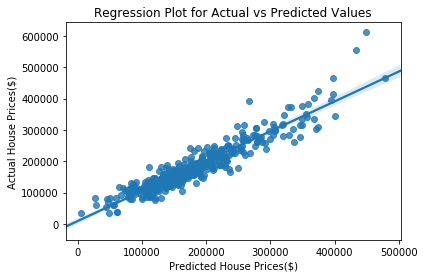

In [117]:
# Regression plot
g = sns.regplot(x=lasso_reg.predict(X_test), y=Y_test, fit_reg=True)
g.set(xlabel='Predicted House Prices($)', ylabel='Actual House Prices($)', title='Model Predictions')
plt.title('Regression Plot for Actual vs Predicted Values')

It is quite evident that the regression line is a good fit to our data.

**Residual Plots**

I plotted residual graphs for train, test seperatley and together using lasso regression.

Text(0.5, 1.0, 'Residual Plot for train data')

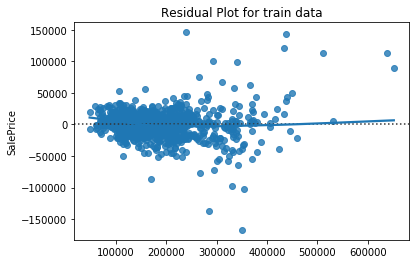

In [118]:
sns.residplot(x=lasso_reg.predict(X_train), y=Y_train, lowess=True)
plt.title('Residual Plot for train data')

The graph looks very much similar to what was produced by Linear Regression and Ridge Regression. The data lies within the -50,000 to +50,000 range where most of the data lies close to the reference line.

Text(0.5, 1.0, 'Residual Plot for test data')

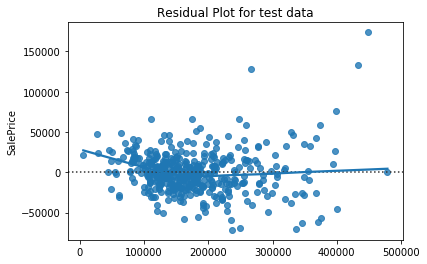

In [119]:
sns.residplot(x=lasso_reg.predict(X_test), y=Y_test, lowess=True)
plt.title('Residual Plot for test data')

The data points are scattered around the reference line. There are few outliers, but most of the data lies with the expected -50,000 to +50,000 range.

Text(0, 0.5, 'Residuals')

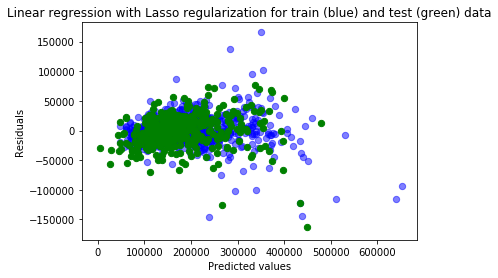

In [120]:
plt.scatter(lasso_reg.predict(X_train), lasso_reg.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lasso_reg.predict(X_test), lasso_reg.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title("Linear regression with Lasso regularization for train (blue) and test (green) data")
plt.xlabel("Predicted values")
plt.ylabel('Residuals')

From the graph the train and test data points are close to each other indicating that the model is performing well on the test data too.

Let us see what coefficients does lasso regression produce and what are the top features that influence Sale price.

In [121]:
# Features and thier respective coefficients
lasso_coeffs_df = pd.DataFrame(list(zip(X.columns, lasso_reg.coef_)), columns = ['Features', 'Estimated_Coefficients'])
lasso_coeffs_df.sort_values(by='Estimated_Coefficients', ascending=False)

,Features,Estimated_Coefficients
4,OverallCond,16513.450764
14,LowQualFinSF,11886.183189
16,BsmtFullBath,8205.580153
12,1stFlrSF,5578.594375
26,GarageArea,5478.277657
13,2ndFlrSF,4991.449093
8,BsmtFinSF1,4724.165314
23,Fireplaces,4563.970085
5,YearBuilt,4353.726185
19,HalfBath,4326.108121


In [122]:
lasso_pos_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])>=0].sort_values(by='Estimated_Coefficients', ascending=False)
lasso_pos_coeffs_df

,Features,Estimated_Coefficients
4,OverallCond,16513.450764
14,LowQualFinSF,11886.183189
16,BsmtFullBath,8205.580153
12,1stFlrSF,5578.594375
26,GarageArea,5478.277657
13,2ndFlrSF,4991.449093
8,BsmtFinSF1,4724.165314
23,Fireplaces,4563.970085
5,YearBuilt,4353.726185
19,HalfBath,4326.108121


As we can see the features changed from what we saw in Ridge rgression, Lasso results show added new features such as MasVnrArea - type of material used in external of  the house (brick/ stone etc.),  GarageYrBlt - garage biult year. The other features remain same as the other regression models i.e. 2ndFlrSF  LowQualFinSF OverallCond.

The results of Lasso regression (MasVnrArea and GarageYrBlt) seem to be unrealistic in real estate market. 

In [123]:
lasso_neg_coeffs_df = lasso_coeffs_df[(lasso_coeffs_df['Estimated_Coefficients'])<0].sort_values(by='Estimated_Coefficients', ascending=True)
lasso_neg_coeffs_df

,Features,Estimated_Coefficients
6,YearRemodAdd,-5466.841029
1,LotFrontage,-4236.375624
22,TotRmsAbvGrd,-3883.679772
35,YrSold,-1310.115638
15,GrLivArea,-994.197701
25,GarageCars,-909.278960
21,KitchenAbvGr,-876.351856
30,3SsnPorch,-835.231294
11,TotalBsmtSF,-693.166578
34,MoSold,-2.922200


Lasso produced slightly differnt results from Ridge with order of features changed and adding features like Fireplaces and Year built.

**GridSearchCV**

Let us explore the **best hyper parameter (alpha)** and it's respective **score** using **GridSearchCV**

In [124]:
# Create an object 
lasso = Lasso(max_iter = 50000, tol=0.1)

# Fit the model on the trainng data
lasso.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=50000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False)

**Apply GridSearchCV to Ridge Regression find out the alpha value and respective R square**

In [125]:
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='r2')

# Fit the training model 
lasso_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective R2 score
print('Best alpha value is: %s' % lasso_grid.best_params_['alpha'])
print('Score when alpha = %s: is %s \n' % (lasso_grid.best_params_['alpha'],r2_score(lasso_grid.predict(X_test), Y_test)))

Best alpha value is: 10
Score when alpha = 10: is 0.8198651958206763 



Let us compare the R2 scores for train and test data using GridSearchCV

In [126]:
R2_lasso_grid_train = r2_score(lasso_grid.predict(X_train), Y_train)
R2_lasso_grid_test = r2_score(lasso_grid.predict(X_test), Y_test)
print('R squared for train data is: %.3f' %(R2_lasso_grid_train))
print('R squared for test data is: %.3f' %(R2_lasso_grid_test))

R squared for train data is: 0.898
R squared for test data is: 0.820


**Let's repeat the same using Lasso & GridSearchCV process to find out RMSE values for train and test data sets**

In [127]:
# Import library to find out score MSE
from sklearn.metrics import mean_squared_error

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='neg_mean_squared_error')

# Fit the training model
lasso_grid.fit(X_train, Y_train)

# Get the best alpha value and it's respective RMSE score
print("Best alpha value is: %s" % lasso_grid.best_params_["alpha"])
print("Accuracy from alpha = %s: %s \n" % (lasso_grid.best_params_["alpha"],
                                           sqrt(mean_squared_error(lasso_grid.predict(X_test), Y_test))))

Best alpha value is: 10
Accuracy from alpha = 10: 33835.537049658975 



Let us compare the RMSE scores for train and test data using GridSearchCV

In [128]:
RMSE_lasso_grid_train = sqrt(mean_squared_error(lasso_grid.predict(X_train), Y_train))
RMSE_lasso_grid_test = sqrt(mean_squared_error(lasso_grid.predict(X_test), Y_test))
print('Root mean squared error for train data is: %.3f' %(RMSE_lasso_grid_train))
print('Root mean sqaured error for test data is: %.3f' %(RMSE_lasso_grid_test))

Root mean squared error for train data is: 25386.622
Root mean sqaured error for test data is: 33835.537


**We can conclude that the best alpha value is 10 for Lasso Regression**

# Comparing the models

Let us compare all the models and evaluate one model that is best suited to the data, this can be acheived by comparing the scores of train and test sets for each model. 

In [129]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['Linear Reg','RidgeCV Reg','LassoCV Reg', 'Ridge_GridSearchCV', 'Lasso_GridSearchCV'],
         'RMSE_train': [20426.160, 25725.420, 26498.918, 25725.420, 25386.622],
         'RMSE_test': [30352.931, 25777.429, 25777.429, 25777.429, 33835.537],
         'R2_train': [0.936, 0.898, 0.927, 0.882,0.898 ],
         'R2_test': [0.843, 0.887, 0.880, 0.873, 0.820],
         'Best_alpha': ['N/A', 10.0, 1.0, 10.0, 10.0]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

,Index,RMSE_train,RMSE_test,R2_train,R2_test,Best_alpha
0,Linear Reg,20426.160,30352.931,0.936,0.843,N/A
1,RidgeCV Reg,25725.420,25777.429,0.898,0.887,10
2,LassoCV Reg,26498.918,25777.429,0.927,0.880,1
3,Ridge_GridSearchCV,25725.420,25777.429,0.882,0.873,10
4,Lasso_GridSearchCV,25386.622,33835.537,0.898,0.820,10
